In [1]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import autoqnn

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


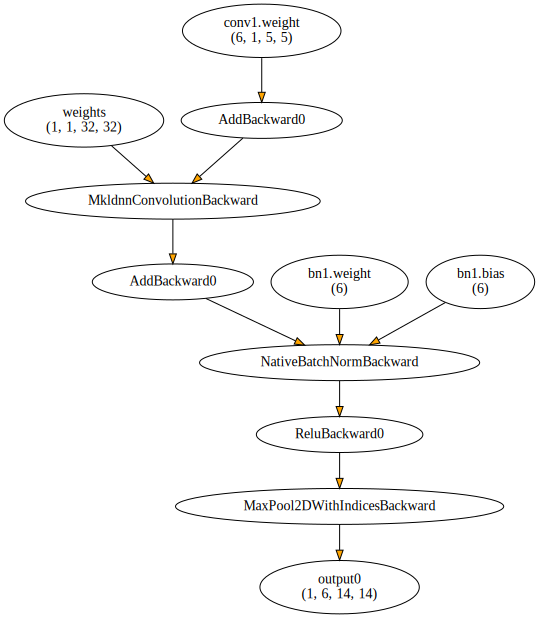

In [2]:
from torch import nn
from autoqnn.utils import view_module
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.bn1 = nn.BatchNorm2d(6) # 1 input image channel, 6 output channels, 5x5 square convolution kernel

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.bn1(self.conv1(x))), (2, 2)) # Max pooling over a (2, 2) window
        return x
module = Net()
q_model = autoqnn.core.convert(module,
                               quantize_config_dict={
                                   "weight_quant":autoqnn.quantizers.FixedQuant(bitwidth=4),
                                   "act_quant":autoqnn.quantizers.FixedQuantAct(bitwidth=4)})
nodes,edges,dot=autoqnn.utils.view_module(q_model,(1,1,32,32))
dot

In [3]:
q_model

Net(
  (conv1): Conv2d(
    1, 6, kernel_size=(5, 5), stride=(1, 1), bias=False
    (bias_quant): Quantization()
    (weight_quant): FixedQuant()
    (act_quant): FixedQuantAct()
  )
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)